In [3]:
from pyspark.sql import *
from pyspark.sql import functions as func
spark = SparkSession.builder.getOrCreate()

22/02/07 11:17:46 WARN Utils: Your hostname, Inspiron-5566 resolves to a loopback address: 127.0.1.1; using 192.168.43.93 instead (on interface wlp1s0)
22/02/07 11:17:46 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
22/02/07 11:17:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [5]:
df = spark.read.csv("hdfs://localhost:9000/Files/input/cpulogdata.csv",header=True)
df1 = df.select('DateTime','boot_time','keyboard','mouse','user_name')
df1.show()

+-------------------+--------------------+--------+-----+--------------------+
|           DateTime|           boot_time|keyboard|mouse|           user_name|
+-------------------+--------------------+--------+-----+--------------------+
|2019-11-17 05:30:01| 1day15:20:58.870261|       0|    0| ismpraful@gmail.com|
|2019-11-17 05:30:02| 1day14:16:11.068401|       0|    0|  sahil24c@gmail.com|
|2019-11-17 05:30:01|     19:36:09.905103|       0|    0|aman.raj251@gmail...|
|2019-11-17 05:35:01| 1day15:25:58.870261|       0|    0| ismpraful@gmail.com|
|2019-11-17 05:35:01| 1day14:21:10.870261|       0|    0|  sahil24c@gmail.com|
|2019-11-17 05:35:01|     19:41:09.601800|       0|    0|aman.raj251@gmail...|
|2019-11-17 05:40:01| 1day15:30:58.870261|       0|    0| ismpraful@gmail.com|
|2019-11-17 05:40:01| 1day14:26:10.870261|       0|    0|  sahil24c@gmail.com|
|2019-11-17 05:40:01|     19:46:09.382559|       0|    0|aman.raj251@gmail...|
|2019-11-17 05:45:02| 1day15:35:59.870261|       0| 

In [6]:
#create view table named as Data_Table
df1.createOrReplaceTempView("Data_Table")
users_count = spark.sql("SELECT user_name FROM Data_Table").groupby("user_name").count()
users_count.show()

22/02/07 11:21:36 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------+-----+
|           user_name|count|
+--------------------+-----+
|priyagund18@gmail...|   72|
|aman.raj251@gmail...|  154|
|       gaikwadravi03|   72|
|puruissimple@gmai...|   72|
|  shelkeva@gmail.com|   79|
|tekina.makin@gmai...|   44|
|deepak.63584@gmai...|   69|
|kaleshwetaanil@gm...|   74|
|20150773@dbatu.ac.in|   71|
|antonyalexcm@gmai...|   46|
|     you@example.com|  101|
|kalyani24deobhank...|   77|
|shivanjalisangale...|   71|
|  sahil24c@gmail.com|  153|
|manojmansukh7@gma...|    4|
|naineshpatil11@gm...|    2|
|vaishusawant143@g...|   71|
|prathameshsalap@g...|   83|
|nitishtech.info@g...|    8|
|hemilturakhia@gma...|   75|
+--------------------+-----+
only showing top 20 rows



In [10]:
avg_hr_df = spark.sql("SELECT user_name FROM Data_Table WHERE keyboard != 0 or mouse !=0")\
            .groupby("user_name").count()

avg_hr_df.show()

+--------------------+-----+
|           user_name|count|
+--------------------+-----+
|priyagund18@gmail...|   56|
|       gaikwadravi03|   63|
|puruissimple@gmai...|   55|
|  shelkeva@gmail.com|   65|
|tekina.makin@gmai...|   38|
|deepak.63584@gmai...|   33|
|kaleshwetaanil@gm...|   52|
|20150773@dbatu.ac.in|   62|
|antonyalexcm@gmai...|    2|
|     you@example.com|   90|
|kalyani24deobhank...|   55|
|shivanjalisangale...|   67|
|naineshpatil11@gm...|    2|
|vaishusawant143@g...|   57|
|prathameshsalap@g...|   68|
|nitishtech.info@g...|    8|
|hemilturakhia@gma...|   69|
|pramodmane58@gmai...|    1|
|sachinbarpete87@g...|    1|
|jitendrabachhav04...|   60|
+--------------------+-----+
only showing top 20 rows



In [11]:
'''ii)creating table  and performing on count to convert the minutes
 into secs for each 5 minutes time interval as mentioned '''

df3 = avg_hr_df.createOrReplaceTempView("hour_view")
df4 = spark.sql("SELECT user_name,count,((((count-1) *5)*60)/6) as avg_secs from hour_view")
df4.show()

+--------------------+-----+--------+
|           user_name|count|avg_secs|
+--------------------+-----+--------+
|priyagund18@gmail...|   56|  2750.0|
|       gaikwadravi03|   63|  3100.0|
|puruissimple@gmai...|   55|  2700.0|
|  shelkeva@gmail.com|   65|  3200.0|
|tekina.makin@gmai...|   38|  1850.0|
|deepak.63584@gmai...|   33|  1600.0|
|kaleshwetaanil@gm...|   52|  2550.0|
|20150773@dbatu.ac.in|   62|  3050.0|
|antonyalexcm@gmai...|    2|    50.0|
|     you@example.com|   90|  4450.0|
|kalyani24deobhank...|   55|  2700.0|
|shivanjalisangale...|   67|  3300.0|
|naineshpatil11@gm...|    2|    50.0|
|vaishusawant143@g...|   57|  2800.0|
|prathameshsalap@g...|   68|  3350.0|
|nitishtech.info@g...|    8|   350.0|
|hemilturakhia@gma...|   69|  3400.0|
|pramodmane58@gmai...|    1|     0.0|
|sachinbarpete87@g...|    1|     0.0|
|jitendrabachhav04...|   60|  2950.0|
+--------------------+-----+--------+
only showing top 20 rows



In [12]:
'''iii) coverting secs into hours
86400--total no of secs per day'''
from pyspark.sql.functions import *
highest_avg_hour = df4.withColumn("average hours",concat(floor(col("avg_secs") % 86400/3600), lit(":"),
            floor((col("avg_secs") % 86400) % 3600 / 60), lit (""),
            ))\
        .drop("avg_secs")\
        .sort(desc("average hours"))


highest_avg_hour.show()

+--------------------+-----+-------------+
|           user_name|count|average hours|
+--------------------+-----+-------------+
|     you@example.com|   90|         1:14|
|hemilturakhia@gma...|   69|         0:56|
|shivanjalisangale...|   67|         0:55|
|prathameshsalap@g...|   68|         0:55|
|  shelkeva@gmail.com|   65|         0:53|
|       gaikwadravi03|   63|         0:51|
|20150773@dbatu.ac.in|   62|         0:50|
|dipakalagate1991@...|   62|         0:50|
|nitishtech.info@g...|    8|          0:5|
|jitendrabachhav04...|   60|         0:49|
|zafaraabid3295@gm...|   60|         0:49|
|vaishusawant143@g...|   57|         0:46|
|priyagund18@gmail...|   56|         0:45|
|kalyani24deobhank...|   55|         0:45|
|puruissimple@gmai...|   55|         0:45|
|kaleshwetaanil@gm...|   52|         0:42|
|tekina.makin@gmai...|   38|         0:30|
|deepak.63584@gmai...|   33|         0:26|
|pramodmane58@gmai...|    1|          0:0|
|sachinbarpete87@g...|    1|          0:0|
+----------

In [13]:
'''finding lowest no of avg hours'''
from pyspark.sql.functions import *
lowest_avg_hour = df4.withColumn("average hours",concat(floor(col("avg_secs") % 86400/3600), lit(":"),
            floor((col("avg_secs") % 86400) % 3600 / 60), lit (""),
            ))\
        .drop("avg_secs")\
        .sort(asc("average hours"))

lowest_avg_hour.show()

+--------------------+-----+-------------+
|           user_name|count|average hours|
+--------------------+-----+-------------+
|naineshpatil11@gm...|    2|          0:0|
|pramodmane58@gmai...|    1|          0:0|
|sachinbarpete87@g...|    1|          0:0|
|antonyalexcm@gmai...|    2|          0:0|
|deepak.63584@gmai...|   33|         0:26|
|tekina.makin@gmai...|   38|         0:30|
|kaleshwetaanil@gm...|   52|         0:42|
|puruissimple@gmai...|   55|         0:45|
|kalyani24deobhank...|   55|         0:45|
|priyagund18@gmail...|   56|         0:45|
|vaishusawant143@g...|   57|         0:46|
|jitendrabachhav04...|   60|         0:49|
|zafaraabid3295@gm...|   60|         0:49|
|nitishtech.info@g...|    8|          0:5|
|20150773@dbatu.ac.in|   62|         0:50|
|dipakalagate1991@...|   62|         0:50|
|       gaikwadravi03|   63|         0:51|
|  shelkeva@gmail.com|   65|         0:53|
|prathameshsalap@g...|   68|         0:55|
|shivanjalisangale...|   67|         0:55|
+----------

In [14]:
'''Finding users with highest numbers of idle hours'''
df5 = spark.sql("SELECT user_name FROM Data_Table WHERE keyboard == 0 and mouse == 0")\
            .groupby("user_name").count()

df5.show()

+--------------------+-----+
|           user_name|count|
+--------------------+-----+
|priyagund18@gmail...|   16|
|aman.raj251@gmail...|  154|
|       gaikwadravi03|    9|
|puruissimple@gmai...|   17|
|  shelkeva@gmail.com|   14|
|tekina.makin@gmai...|    6|
|deepak.63584@gmai...|   36|
|kaleshwetaanil@gm...|   22|
|20150773@dbatu.ac.in|    9|
|antonyalexcm@gmai...|   44|
|     you@example.com|   11|
|kalyani24deobhank...|   22|
|shivanjalisangale...|    4|
|  sahil24c@gmail.com|  153|
|manojmansukh7@gma...|    4|
|vaishusawant143@g...|   14|
|prathameshsalap@g...|   15|
|hemilturakhia@gma...|    6|
|pramodmane58@gmai...|   56|
|sachinbarpete87@g...|   51|
+--------------------+-----+
only showing top 20 rows



In [15]:
df5.createOrReplaceTempView("idle_hr_view")
df6 = spark.sql("SELECT user_name,count,((((count-1) *5)*60)/6) as avg_secs from idle_hr_view")
df6.show()

+--------------------+-----+--------+
|           user_name|count|avg_secs|
+--------------------+-----+--------+
|priyagund18@gmail...|   16|   750.0|
|aman.raj251@gmail...|  154|  7650.0|
|       gaikwadravi03|    9|   400.0|
|puruissimple@gmai...|   17|   800.0|
|  shelkeva@gmail.com|   14|   650.0|
|tekina.makin@gmai...|    6|   250.0|
|deepak.63584@gmai...|   36|  1750.0|
|kaleshwetaanil@gm...|   22|  1050.0|
|20150773@dbatu.ac.in|    9|   400.0|
|antonyalexcm@gmai...|   44|  2150.0|
|     you@example.com|   11|   500.0|
|kalyani24deobhank...|   22|  1050.0|
|shivanjalisangale...|    4|   150.0|
|  sahil24c@gmail.com|  153|  7600.0|
|manojmansukh7@gma...|    4|   150.0|
|vaishusawant143@g...|   14|   650.0|
|prathameshsalap@g...|   15|   700.0|
|hemilturakhia@gma...|    6|   250.0|
|pramodmane58@gmai...|   56|  2750.0|
|sachinbarpete87@g...|   51|  2500.0|
+--------------------+-----+--------+
only showing top 20 rows



In [16]:
''' highest idle hours
coverting secs into hours
86400--total no of secs per day'''
from pyspark.sql.functions import *
highest_idle_hour = df6.withColumn("idle_hours",concat(floor(col("avg_secs") % 86400/3600), lit(":"),
            floor((col("avg_secs") % 86400) % 3600 / 60), lit (""),
            ))\
        .drop("avg_secs")\
        .sort(desc("idle_hours"))


highest_idle_hour.show()

+--------------------+-----+----------+
|           user_name|count|idle_hours|
+--------------------+-----+----------+
|aman.raj251@gmail...|  154|       2:7|
|  sahil24c@gmail.com|  153|       2:6|
| ismpraful@gmail.com|  153|       2:6|
|zafaraabid3295@gm...|   12|       0:9|
|dipakalagate1991@...|   12|       0:9|
|     you@example.com|   11|       0:8|
|       gaikwadravi03|    9|       0:6|
|20150773@dbatu.ac.in|    9|       0:6|
|pramodmane58@gmai...|   56|      0:45|
|sachinbarpete87@g...|   51|      0:41|
|hemilturakhia@gma...|    6|       0:4|
|tekina.makin@gmai...|    6|       0:4|
|antonyalexcm@gmai...|   44|      0:35|
|deepak.63584@gmai...|   36|      0:29|
|shivanjalisangale...|    4|       0:2|
|manojmansukh7@gma...|    4|       0:2|
|kalyani24deobhank...|   22|      0:17|
|kaleshwetaanil@gm...|   22|      0:17|
|puruissimple@gmai...|   17|      0:13|
|priyagund18@gmail...|   16|      0:12|
+--------------------+-----+----------+
only showing top 20 rows



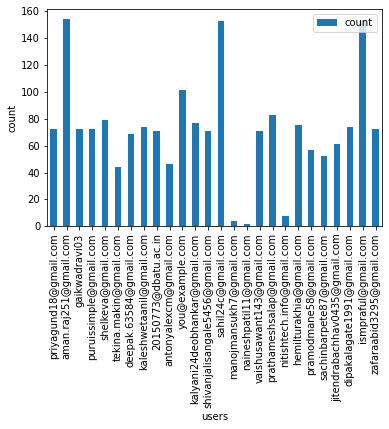

In [7]:
import matplotlib.pyplot as plt
# converting pyspark dataframe to pandas dataframe
data_frame = users_count.toPandas()
data_frame.plot(kind = 'bar',x='user_name',y='count')
plt.xlabel('users')
plt.ylabel('count')
plt.show()

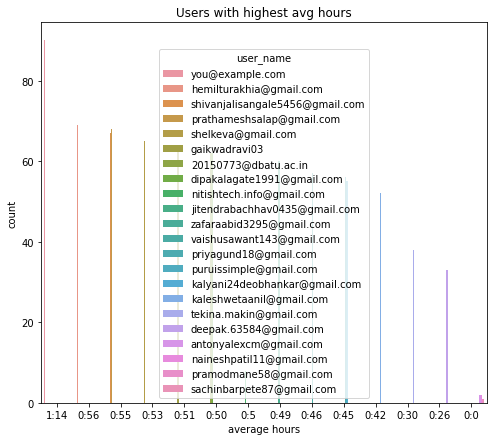

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
high_avg_df = highest_avg_hour.toPandas()
plt.figure(figsize = (8,7))
sns.barplot(x = 'average hours',y='count',data = high_avg_df,hue='user_name')
plt.title("Users with highest avg hours")
plt.show()

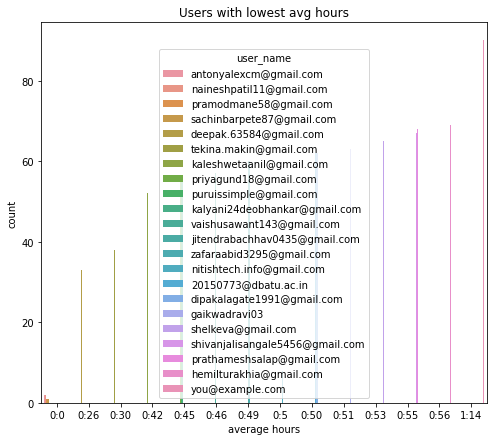

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
low_avg_df = lowest_avg_hour.toPandas()
plt.figure(figsize = (8,7))
sns.barplot(x = 'average hours',y='count',data = low_avg_df,hue='user_name')
plt.title("Users with lowest avg hours")
plt.show()

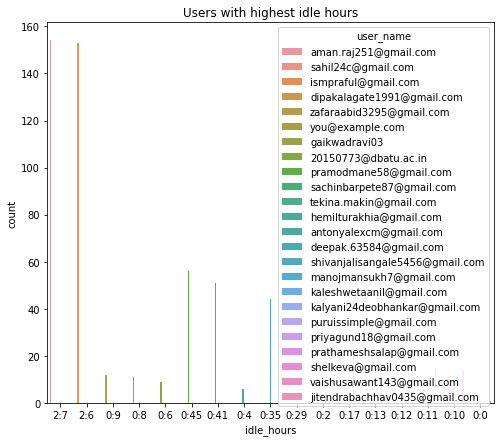

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
idle_df = highest_idle_hour.toPandas()
plt.figure(figsize = (8,7))
sns.barplot(x = 'idle_hours',y='count',data = idle_df,hue='user_name')
plt.title("Users with highest idle hours")
plt.show(5)